In [6]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Camada oculta com 100 neurônios
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

mlp.fit(x_train, y_train)

# Previsões
y_pred = mlp.predict(x_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')



Acurácia do modelo: 0.98


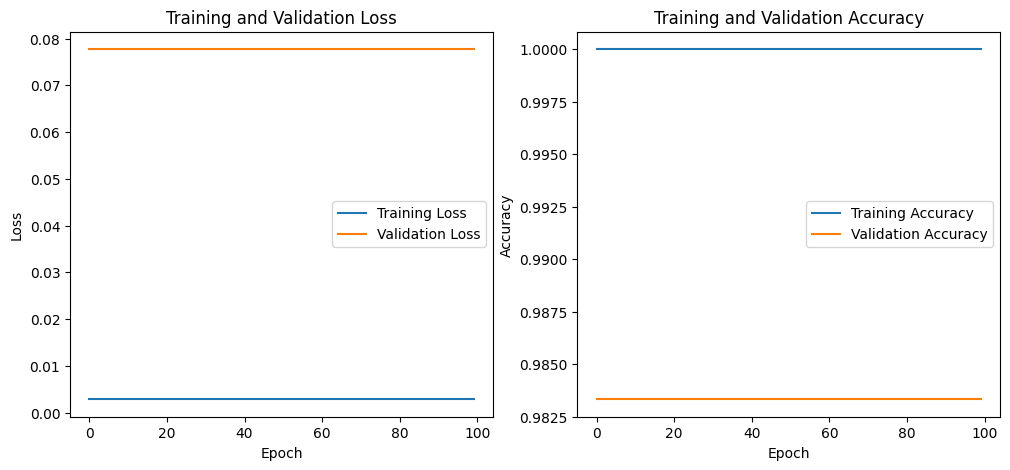

In [10]:
from sklearn.metrics import log_loss
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Camada oculta com 100 neurônios
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Lists to store metrics
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

# Training loop
for epoch in range(100):  # assuming 100 epochs
    mlp.fit(x_train, y_train)

    # Predictions for training and validation sets
    y_train_pred = mlp.predict_proba(x_train)
    y_val_pred = mlp.predict_proba(x_test)

    # Calculate and store the loss and accuracy
    training_loss.append(log_loss(y_train, y_train_pred))
    validation_loss.append(log_loss(y_test, y_val_pred))
    training_accuracy.append(accuracy_score(y_train, mlp.predict(x_train)))
    validation_accuracy.append(accuracy_score(y_test, mlp.predict(x_test)))

# Plotting the metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()